In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

## Data Understanding

In [32]:
train_targets = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/A/train_targets.parquet')
X_train_observed = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/A/X_train_observed.parquet')
X_train_estimated = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/A/X_train_estimated.parquet')

In [33]:
train_targets.shape, X_train_observed.shape, X_train_estimated.shape

((34085, 2), (118669, 46), (17576, 47))

In [34]:
train_targets.head()

,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36


In [35]:
X_train_observed.head()

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0


In [36]:
# includes an additional index called 'date_calc'
X_train_estimated.head()

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.0,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.0,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.0,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.0,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.0,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.0,6254.399902,0.6,-0.1,0.6,-0.0


In [58]:
gaps_dict = {}

# Loop through each feature in the DataFrame
for feature in X_train_estimated.columns:
    current_gap = 0
    start_index = None
    gaps = []
    
    # Loop through each value in the feature
    for index, value in enumerate(X_train_estimated[feature]):
        # Check if the value is zero or NaN
        if value == 0 or np.isnan(value):
            current_gap += 1
            if start_index is None:
                start_index = index
        else:
            if current_gap > 100:  
                gaps.append((start_index, index - 1, current_gap))
            current_gap = 0
            start_index = None
            
    # Check for the last gap in case the feature ends with a gap
    if current_gap > 100:
        gaps.append((start_index, index, current_gap))
        
    gaps_dict[feature] = gaps

# Print the gaps for each feature
print(gaps_dict)

{'is_in_shadow:idx': [], 'is_day:idx': [], 'sun_elevation:d': [], 'diffuse_rad_1h:J': [], 'diffuse_rad:W': [], 'clear_sky_energy_1h:J': [], 'clear_sky_rad:W': [], 'direct_rad_1h:J': [(3038, 3213, 176), (3520, 3694, 175), (4383, 4559, 177), (5823, 5999, 177), (6592, 6770, 179), (8228, 8492, 265), (8709, 8875, 167), (11019, 11173, 155)], 'direct_rad:W': [(3030, 3213, 184), (3516, 3694, 179), (4379, 4559, 181), (5819, 5999, 181), (6588, 6770, 183), (8224, 8492, 269), (8702, 8875, 174), (11015, 11173, 159)]}


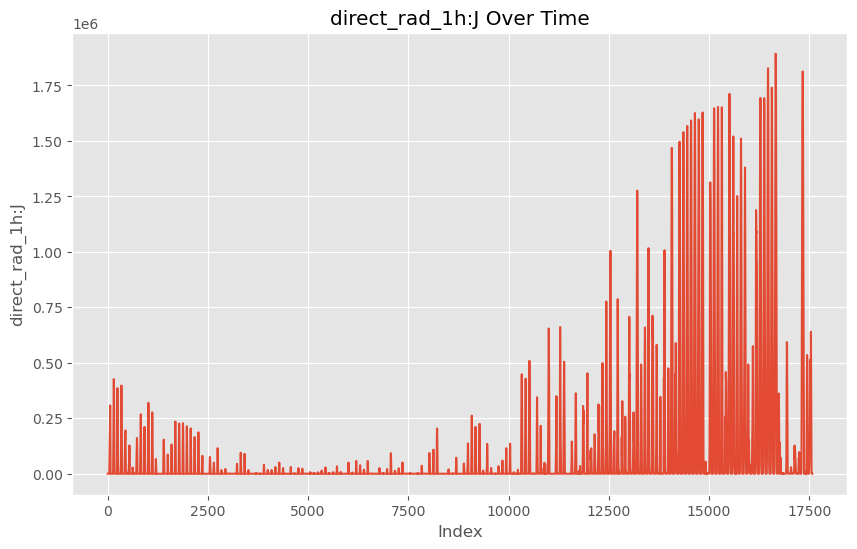

In [59]:
direct_rad_1h = X_train_estimated['direct_rad_1h:J']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(direct_rad_1h)
plt.title('direct_rad_1h:J Over Time')
plt.xlabel('Index')
plt.ylabel('direct_rad_1h:J')
plt.grid(True)

# Show the plot
plt.show()

In [37]:
train_targets.dtypes

time              datetime64[ns]
pv_measurement           float64
dtype: object

In [38]:
X_train_estimated.dtypes

date_calc                         datetime64[ns]
date_forecast                     datetime64[ns]
absolute_humidity_2m:gm3                 float32
air_density_2m:kgm3                      float32
ceiling_height_agl:m                     float32
clear_sky_energy_1h:J                    float32
clear_sky_rad:W                          float32
cloud_base_agl:m                         float32
dew_or_rime:idx                          float32
dew_point_2m:K                           float32
diffuse_rad:W                            float32
diffuse_rad_1h:J                         float32
direct_rad:W                             float32
direct_rad_1h:J                          float32
effective_cloud_cover:p                  float32
elevation:m                              float32
fresh_snow_12h:cm                        float32
fresh_snow_1h:cm                         float32
fresh_snow_24h:cm                        float32
fresh_snow_3h:cm                         float32
fresh_snow_6h:cm    

In [39]:
X_train_observed.dtypes

date_forecast                     datetime64[ns]
absolute_humidity_2m:gm3                 float32
air_density_2m:kgm3                      float32
ceiling_height_agl:m                     float32
clear_sky_energy_1h:J                    float32
clear_sky_rad:W                          float32
cloud_base_agl:m                         float32
dew_or_rime:idx                          float32
dew_point_2m:K                           float32
diffuse_rad:W                            float32
diffuse_rad_1h:J                         float32
direct_rad:W                             float32
direct_rad_1h:J                          float32
effective_cloud_cover:p                  float32
elevation:m                              float32
fresh_snow_12h:cm                        float32
fresh_snow_1h:cm                         float32
fresh_snow_24h:cm                        float32
fresh_snow_3h:cm                         float32
fresh_snow_6h:cm                         float32
is_day:idx          

In [40]:
X_train_estimated.describe()

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,17576,17576,17576.000000,17576.000000,13657.000000,1.757600e+04,17576.000000,15482.000000,17576.000000,17576.000000,17576.000000,1.757600e+04,17576.000000,1.757600e+04,17576.000000,17576.0,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,1807.0,17576.000000,17576.0,17576.00000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.0
mean,2023-01-27 19:07:13.160673536,2023-01-28 23:11:50.127446528,4.092438,1.281746,3257.459473,2.371263e+05,65.868149,1575.233032,0.008990,270.222351,22.836435,8.221085e+04,25.725431,9.261137e+04,68.346710,6.0,0.325085,0.027555,0.628334,0.083136,0.164838,0.349226,0.695380,1009.408142,0.004077,0.075956,996.317566,1002.565063,0.532237,0.003146,72.632843,1008.840332,250.0,0.213575,0.0,0.00057,0.077008,179.677383,-10.692363,0.032556,274.722656,73.760681,33458.078125,3.183540,-0.015197,0.926172,0.0
min,2022-10-27 07:00:18,2022-10-28 22:00:00,1.000000,1.212000,27.900000,0.000000e+00,0.000000,27.799999,-1.000000,254.699997,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,970.700012,0.000000,0.000000,958.299988,964.200012,0.000000,0.000000,21.500000,970.099976,250.0,0.000000,0.0,-0.00000,0.000000,0.013000,-50.004002,0.000000,259.700012,0.000000,190.500000,0.100000,-7.200000,-5.300000,-0.0
25%,2022-12-12 08:00:05,2022-12-13 16:26:15,3.000000,1.262000,1185.500000,0.000000e+00,0.000000,497.524994,0.000000,266.799988,0.000000,0.000000e+00,0.000000,0.000000e+00,42.700001,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.099976,0.000000,0.000000,986.200012,992.400024,0.000000,0.000000,63.099998,998.599976,250.0,0.000000,0.0,-0.00000,0.000000,94.669249,-28.210751,0.000000,271.799988,49.099998,19838.000488,1.700000,-2.200000,-0.200000,-0.0
50%,2023-01-28 08:00:04,2023-01-29 10:52:30,3.900000,1.279000,2750.000000,0.000000e+00,0.000000,935.750000,0.000000,270.399994,0.000000,0.000000e+00,0.000000,0.000000e+00,84.300003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1009.599976,0.000000,0.000000,996.400024,1002.700012,0.000000,0.000000,74.699997,1009.000000,250.0,0.000000,0.0,-0.00000,0.000000,179.510498,-9.930000,0.000000,274.700012,97.099998,34456.800781,2.900000,-0.300000,1.000000,-0.0
75%,2023-03-15 08:00:04,2023-03-16 05:18:45,5.100000,1.301000,4775.500000,1.374874e+05,37.400002,1919.599976,0.000000,273.899994,22.900000,8.024315e+04,0.800000,1.051160e+04,99.800003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1019.599976,0.000000,0.000000,1006.299988,1012.599976,0.000000,0.000000,83.400002,1019.000000,250.0,0.000000,0.0,0.00000,0.100000,264.569756,4.489000,0.000000,277.799988,100.000000,47726.226562,4.300000,1.600000,2.000000,0.0
max,2023-04-29 07:00:05,2023-04-30 23:45:00,8.800000,1.374000,12307.700195,2.555980e+06,711.599976,10813.700195,1.000000,282.100006,300.500000,1.061123e+06,530.400024,1.893098e+06,100.000000,6.0,10.300000,3.5000

In [41]:
X_train_observed.describe()

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,118669,118669.000000,118669.000000,96422.000000,1.186690e+05,118669.000000,110603.000000,118669.000000,118669.000000,118669.000000,1.186690e+05,118669.000000,1.186690e+05,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,2724.0,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000
mean,2021-02-09 23:30:00.000000512,6.652576,1.249064,2907.949219,5.994018e+05,166.500381,1737.142212,0.022398,276.823395,44.918282,1.617057e+05,56.611744,2.038025e+05,67.605507,6.0,0.053117,0.004418,0.106243,0.013277,0.026567,0.521391,0.511650,1009.632996,0.006302,0.091018,996.765381,1002.868225,0.187399,0.011914,74.231705,1008.998352,250.0,0.052763,0.0,0.000062,0.091566,179.629486,1.529545,0.059087,280.708557,74.401077,32446.992188,3.043197,0.756781,0.517437,0.000019
min,2019-06-02 22:00:00,0.700000,1.145000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,250.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,932.299988,938.099976,0.000000,0.000000,22.700001,943.900024,250.0,0.000000,0.0,-0.000000,0.000000,0.002000,-50.004002,0.000000,258.899994,0.000000,154.300003,0.000000,-7.300000,-9.300000,-0.000000
25%,2020-04-06 22:45:00,4.400000,1.224000,1102.900024,0.000000e+00,0.000000,590.700012,0.000000,272.100006,0.000000,0.000000e+00,0.000000,0.000000e+00,43.299999,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.099976,0.000000,0.000000,989.299988,995.299988,0.000000,0.000000,65.000000,1001.400024,250.0,0.000000,0.0,0.000000,0.000000,88.487999,-15.066000,0.000000,275.899994,54.799999,15592.400391,1.700000,-1.400000,-0.700000,0.000000
50%,2021-02-09 23:30:00,6.300000,1.247000,1882.400024,3.574770e+04,8.600000,1162.599976,0.000000,277.200012,4.100000,2.481410e+04,0.000000,8.960000e+01,80.500000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1010.700012,0.000000,0.000000,997.900024,1003.900024,0.000000,0.000000,76.699997,1010.000000,250.0,0.000000,0.0,0.000000,0.000000,179.436996,1.202000,0.000000,280.700012,93.699997,36359.800781,2.700000,0.400000,0.500000,0.000000
75%,2021-12-16 00:15:00,8.600000,1.272000,3969.750000,1.037819e+06,288.799988,2079.600098,0.000000,282.000000,76.000000,2.743256e+05,41.799999,1.598314e+05,98.800003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1018.299988,0.000000,0.000000,1005.400024,1011.500000,0.000000,0.000000,85.400002,1017.599976,250.0,0.000000,0.0,0.000000,0.100000,270.640991,18.995001,0.100000,285.200012,99.900002,48084.500000,4.100000,2.700000,1.700000,0.000000
max,2022-10-21 01:00:00,17.500000,1.427000,12328.500000,3.005720e+06,836.400024,11688.700195,1.000000,293.799988,345.700012,1.205498e+06,688.700012,2.451173e+06,100.000000,6.0,15.100000,3.900000,15.100000,7.900000,14.800000,1.000000,1.000000,1044.000000,2.230000,

In [42]:
feature_names_observed = [
    "is_in_shadow:idx",
    "is_day:idx",
    "sun_elevation:d",
    "diffuse_rad_1h:J",
    "diffuse_rad:W",
    "clear_sky_energy_1h:J",
    "clear_sky_rad:W",
    "direct_rad_1h:J",
    "direct_rad:W"
]

X_train_observed = X_train_observed[feature_names_observed].copy()
X_train_observed.describe()


,is_in_shadow:idx,is_day:idx,sun_elevation:d,diffuse_rad_1h:J,diffuse_rad:W,clear_sky_energy_1h:J,clear_sky_rad:W,direct_rad_1h:J,direct_rad:W
count,118669.000000,118669.000000,118669.000000,1.186690e+05,118669.000000,1.186690e+05,118669.000000,1.186690e+05,118669.000000
mean,0.511650,0.521391,1.529545,1.617057e+05,44.918282,5.994018e+05,166.500381,2.038025e+05,56.611744
std,0.499748,0.499342,24.146574,2.301814e+05,64.780273,8.797980e+05,244.907578,4.248438e+05,119.745392
min,0.000000,0.000000,-50.004002,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,-15.066000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,1.000000,1.000000,1.202000,2.481410e+04,4.100000,3.574770e+04,8.600000,8.960000e+01,0.000000
75%,1.000000,1.000000,18.995001,2.743256e+05,76.000000,1.037819e+06,288.799988,1.598314e+05,41.799999
max,1.000000,1.000000,49.999001,1.205498e+06,345.700012,3.005720e+06,836.400024,2.451173e+06,688.700012


In [43]:
feature_names_estimated = [
    "is_in_shadow:idx",
    "is_day:idx",
    "sun_elevation:d",
    "diffuse_rad_1h:J",
    "diffuse_rad:W",
    "clear_sky_energy_1h:J",
    "clear_sky_rad:W",
    "direct_rad_1h:J",
    "direct_rad:W"
]

X_train_estimated = X_train_estimated[feature_names_estimated].copy()
X_train_estimated.describe()

,is_in_shadow:idx,is_day:idx,sun_elevation:d,diffuse_rad_1h:J,diffuse_rad:W,clear_sky_energy_1h:J,clear_sky_rad:W,direct_rad_1h:J,direct_rad:W
count,17576.000000,17576.000000,17576.000000,1.757600e+04,17576.000000,1.757600e+04,17576.000000,1.757600e+04,17576.000000
mean,0.695380,0.349226,-10.692363,8.221085e+04,22.836435,2.371263e+05,65.868149,9.261137e+04,25.725431
std,0.460262,0.476771,21.688944,1.626801e+05,45.802551,5.173429e+05,144.163116,2.811956e+05,79.093826
min,0.000000,0.000000,-50.004002,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,-28.210751,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,1.000000,0.000000,-9.930000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,1.000000,1.000000,4.489000,8.024315e+04,22.900000,1.374874e+05,37.400002,1.051160e+04,0.800000
max,1.000000,1.000000,41.195000,1.061123e+06,300.500000,2.555980e+06,711.599976,1.893098e+06,530.400024


In [44]:
X_train_estimated.isna().sum()

is_in_shadow:idx         0
is_day:idx               0
sun_elevation:d          0
diffuse_rad_1h:J         0
diffuse_rad:W            0
clear_sky_energy_1h:J    0
clear_sky_rad:W          0
direct_rad_1h:J          0
direct_rad:W             0
dtype: int64

In [45]:
X_train_observed.isna().sum()

is_in_shadow:idx         0
is_day:idx               0
sun_elevation:d          0
diffuse_rad_1h:J         0
diffuse_rad:W            0
clear_sky_energy_1h:J    0
clear_sky_rad:W          0
direct_rad_1h:J          0
direct_rad:W             0
dtype: int64

In [46]:
train_targets.isna().sum()

time              0
pv_measurement    0
dtype: int64

In [47]:
zero_pv_values = train_targets[train_targets['pv_measurement'] == 0]
count_zero_pv = len(zero_pv_values)
print(f'Number of zero pv values: {count_zero_pv}')

Number of zero pv values: 16040


In [48]:
consecutive_zero_groups = []
zero_indices = train_targets[train_targets['pv_measurement'] == 0].index

start = zero_indices[0]
for i in range(1, len(zero_indices)):
    if zero_indices[i] != zero_indices[i-1] + 1:
        consecutive_zero_groups.append((start, zero_indices[i-1]))
        start = zero_indices[i]
consecutive_zero_groups.append((start, zero_indices[-1]))

print(consecutive_zero_groups)

[(0, 3), (23, 26), (47, 50), (67, 87), (95, 98), (119, 122), (143, 146), (167, 171), (191, 194), (216, 217), (239, 243), (264, 266), (288, 290), (312, 314), (335, 340), (360, 362), (383, 386), (407, 410), (432, 435), (455, 458), (480, 482), (504, 506), (529, 529), (551, 555), (575, 579), (599, 602), (623, 626), (646, 651), (670, 675), (695, 698), (720, 723), (743, 747), (767, 771), (791, 794), (815, 818), (840, 842), (863, 867), (888, 890), (912, 914), (936, 938), (960, 963), (983, 987), (1007, 1011), (1031, 1035), (1055, 1059), (1079, 1082), (1103, 1106), (1127, 1131), (1151, 1155), (1174, 1179), (1199, 1203), (1223, 1227), (1247, 1251), (1271, 1275), (1295, 1299), (1319, 1323), (1343, 1347), (1367, 1372), (1391, 1395), (1415, 1419), (1439, 1443), (1463, 1468), (1487, 1492), (1510, 1516), (1534, 1539), (1558, 1563), (1582, 1588), (1606, 1612), (1630, 1636), (1654, 1660), (1678, 1684), (1702, 1708), (1726, 1732), (1750, 1756), (1774, 1780), (1797, 1804), (1822, 1828), (1846, 1852), (18

In [49]:
zero_time_values = train_targets.loc[zero_indices, 'time']
time_diffs = zero_time_values.diff().dropna()
print(time_diffs)

1       0 days 01:00:00
2       0 days 01:00:00
3       0 days 01:00:00
23      0 days 20:00:00
24      0 days 01:00:00
              ...      
34063   0 days 01:00:00
34081   0 days 18:00:00
34082   0 days 01:00:00
34083   0 days 01:00:00
34084   0 days 01:00:00
Name: time, Length: 16039, dtype: timedelta64[ns]


In [50]:
train_targets['time'] = pd.to_datetime(train_targets['time'])
train_targets = train_targets.sort_values(by='time')
train_targets['time_diff'] = train_targets['time'].diff()
gaps = train_targets[train_targets['time_diff'] > pd.Timedelta(hours=1)]
print(gaps)

                     time  pv_measurement       time_diff
29667 2022-10-28 22:00:00             0.0 7 days 22:00:00


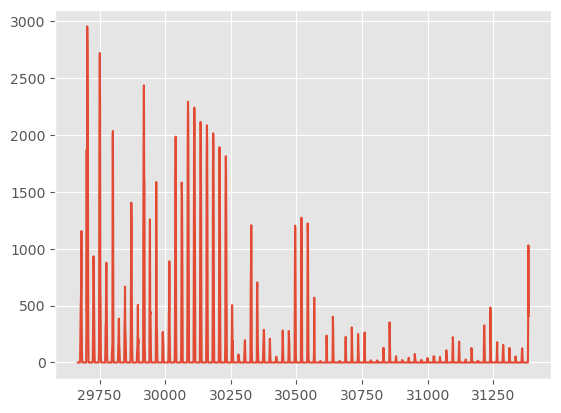

In [53]:
gap_start = '2022-10-28 22:00:00'
gap_end = '2023-01-08 12:00:00'

gap_data = train_targets[(train_targets['time'] >= gap_start) & (train_targets['time'] <= gap_end)]

gap_data['pv_measurement'].plot()
plt.show()